In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import json

In [5]:
class Data:
    def __init__(self, x: np.ndarray, y: np.ndarray, b, m) -> None:
        self.x = x.tolist()
        self.y = y.tolist()
        self.b = float(b)
        self.m = float(m)

    def save_model_params(self, path):
        data_dict = {
            "x": self.x,
            "y": self.y,
            "b": self.b,
            "m": self.m,
        }
        with open(path, 'w') as file:
            json.dump({'data' : data_dict}, file, cls=Data_encoder, indent=4)

    @classmethod
    def load_model_params(cls, path):
        with open(path, 'r') as file:
            data = json.load(file)
            return cls(**data['data'])

In [6]:
class Data_encoder(json.JSONEncoder):
    def default(self, obj: Data):
        if isinstance(obj, Data):
            return {"x" : obj.x.tolist(), "y" : obj.y.tolist(), "params" : [float(obj.b), float(obj.m)]}

        return json.JSONEncoder.default(self, obj)

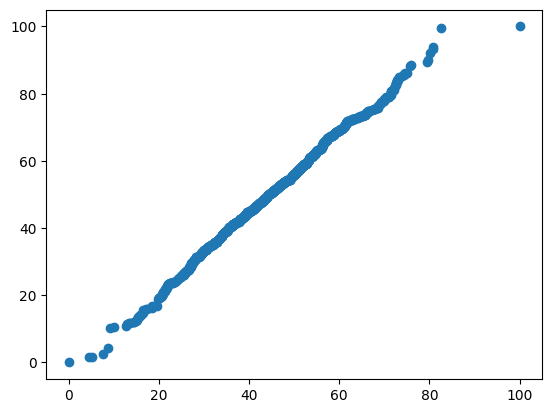

In [3]:
x = random.normal(size=(1000))
y = random.normal(size=(1000))

min_x = np.min(x)
max_x = np.max(x)

min_y = np.min(y)
max_y = np.max(y)

x = np.array(list(map(lambda x : (x - min_x) / (max_x - min_x) * 100, x)))
y = np.array(list(map(lambda y : (y - min_y) / (max_y - min_y) * 100, y)))

x.sort()
y.sort()

plt.scatter(x, y)

In [5]:
def cost(x, y, b, m):
    N = len(x)
    error = (b + m * x - y)
    return np.sum(error**2) / (2 * N)

In [6]:
def gradient_descent(x, y, b, m, learning_rate, iterations):
    #N = len(x)
    hist_cost = []
    for _ in range(iterations):
        hypothesis = b + m * x
        b_deriv = np.mean(hypothesis - y)
        m_deriv = np.mean((hypothesis - y) * x)

        b -= b_deriv * learning_rate
        m -= m_deriv * learning_rate

        hist_cost.append(cost(x, y, b, m))
        
    return b, m, hist_cost

In [7]:
b=1
m=1
K = 0.0001
iters = 100000
b,m, hist_coste = gradient_descent(x, y, b, m, K, iters)
b,m 

(-1.2728427683626635, 1.1527274228952724)

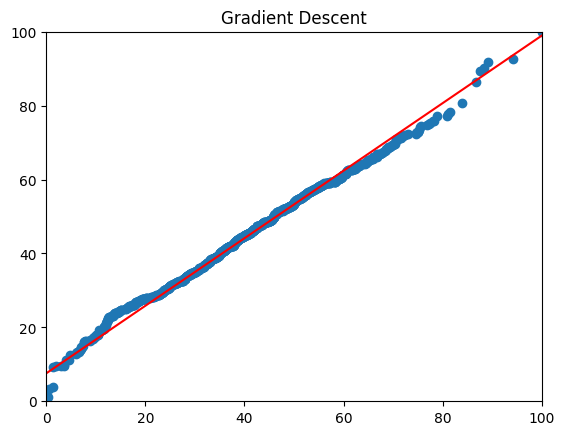

In [112]:
plt.scatter(x, y)
pred_x = [0, max(x)]
pred_y = [b+m*0, b+m*max(x)]
plt.title('Gradient Descent')
plt.axis([0, 100, 0, 100]) 
plt.plot(pred_x, pred_y, "r")

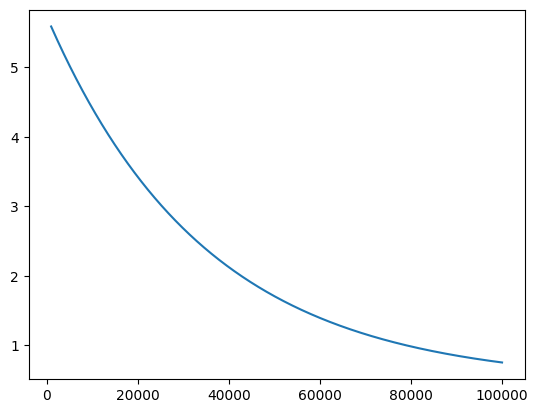

In [113]:
x_base = range(len(hist_coste))
plt.plot(x_base[1000:], hist_coste[1000:])

In [114]:
b, m

(7.53296391713207, 0.9146968024388717)

In [115]:
def get_prediction(b, m, x):
    return b + m*x

In [116]:
get_prediction(b, m, 69)

70.64704328541421

In [126]:
type(x.tolist())

list

In [134]:
data_got = Data(x, y, b, m)
data_got.save_model_params("dataset.json")